# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
import torch
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys

lib_path = os.path.abspath('../../../lib')
sys.path.append(lib_path)

from easy_pytorch import PytorchMLPClassifier, make_confusion_matrix

In [3]:
seed = 12345

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# 2. Read Data

In [4]:
data = pd.read_csv('../image_to_csv/alzheimer_dataset.csv')

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_36599,pixel_36600,pixel_36601,pixel_36602,pixel_36603,pixel_36604,pixel_36605,pixel_36606,pixel_36607,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Columns: 36609 entries, pixel_0 to label
dtypes: float64(36609)
memory usage: 1.4 GB


### 3.1.2. Remove Missing Values

In [6]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [7]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_36599,pixel_36600,pixel_36601,pixel_36602,pixel_36603,pixel_36604,pixel_36605,pixel_36606,pixel_36607,label
count,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,...,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500098
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500049
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


### 3.2.2. Remove Outliers

In [8]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [9]:
target_name = 'label'
feature_name = list(data.columns.drop(target_name))

In [10]:
X = data[feature_name]
y = data[target_name]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [13]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [14]:
classes = np.unique(y_train)

In [15]:
clf = PytorchMLPClassifier(
    input_dim=X_train_scaled.shape[1],
    hidden_layer_sizes=(50, 10, 10),
    activation_function='relu',
    classes=classes,
    learning_rate_init=0.00015,
    epochs=100,
    validation_split=0.1,
    use_gpu=True,
    class_weight='balanced',
    l1_lambda=0.0,
    l2_lambda=0.001,
    dropout_rate=[0, 0, 0],
    solver='adam',
    batch_size=64
)

## 6.2. Train Model

In [16]:
clf.fit(X_train_scaled, y_train)

  0%|          | 0/100 [00:00<?, ?it/s]

{'loss': [0.675678661157345,
  0.6184298550260479,
  0.579392454747496,
  0.5751399187178448,
  0.5356447491152533,
  0.5122894218255734,
  0.49420056209481994,
  0.47931430617283133,
  0.46380032187905806,
  0.44016403833339957,
  0.40892713337109005,
  0.4311609561073369,
  0.3839271782801069,
  0.36713038127997827,
  0.3421125437678962,
  0.3392448969956102,
  0.32486149334701997,
  0.3004541561521333,
  0.285899229861539,
  0.27809364168808376,
  0.2532190608567205,
  0.24690395773484788,
  0.2365012263943409,
  0.22306594432427965,
  0.21271136711383687,
  0.21083830849363885,
  0.1907128650566627,
  0.17988995963643337,
  0.18941429154626255,
  0.16182829516715017,
  0.15664986572388945,
  0.14961526992505994,
  0.14585912150555644,
  0.12897798406152888,
  0.1256388046875082,
  0.11819191835820675,
  0.10952071871223121,
  0.1065654456615448,
  0.09686363623316946,
  0.1100675506067687,
  0.09034421327042169,
  0.08662220964144016,
  0.07825487697946615,
  0.1020626713489664,
  

## 6.3. Loss Curve

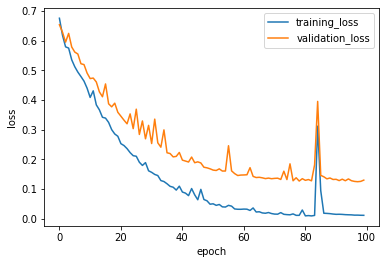

In [17]:
plt.plot(clf.loss_curve_, label='training_loss')
plt.plot(clf.val_loss_curve_, label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [18]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(36608, 50)
(50, 10)
(10, 10)
(10, 2)


In [19]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(50,)
(10,)
(10,)
(2,)


# 7. Prediction

## 7.1. Training Set

In [20]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [21]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

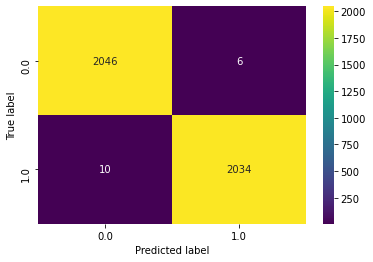

In [22]:
cm = confusion_matrix(y_train, y_pred_train)
make_confusion_matrix(
    cm,
    cmap='viridis',
    categories=classes,
    sum_stats=False,
    percent=False,
)
plt.show()

### 8.1.2. Scoring

In [23]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0.0,0.995136,0.997076,0.996105,2052.000000
1.0,0.997059,0.995108,0.996082,2044.000000
accuracy,0.996094,0.996094,0.996094,0.996094
macro avg,0.996098,0.996092,0.996094,4096.000000
weighted avg,0.996096,0.996094,0.996094,4096.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

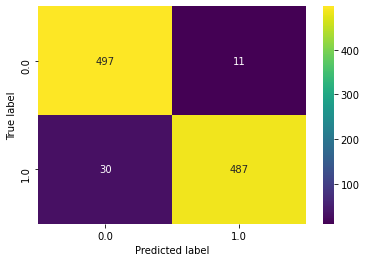

In [25]:
cm = confusion_matrix(y_test, y_pred_test)
make_confusion_matrix(
    cm,
    cmap='viridis',
    categories=classes,
    sum_stats=False,
    percent=False,
)
plt.show()

### 8.2.2. Scoring

In [26]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [27]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0.0,0.943074,0.978346,0.960386,508.00
1.0,0.977912,0.941973,0.959606,517.00
accuracy,0.960000,0.960000,0.960000,0.96
macro avg,0.960493,0.960160,0.959996,1025.00
weighted avg,0.960646,0.960000,0.959993,1025.00


# 9. Save Model

In [28]:
clf.save_model('alzheimer_model')

In [29]:
import pickle

In [30]:
pickle.dump((scaler), open('alzheimer_env.pickle', 'wb'))